<a href="https://colab.research.google.com/github/jnetoass/autoencoder/blob/main/image_reconstruction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import plotly.graph_objects as go #criação de gráficos
from plotly.subplots import make_subplots  #criação de múltiplos grágicos
import plotly.express as px # criação de gráficos
from skimage import io # leitura de imagens
from random import randint # gera números aleatórios

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [ ]:
def visualiza_numero():
  num = randint(0,60000)
  fig = px.imshow(x_train[num],color_continuous_scale='gray')
  fig.update_layout(title={
                        'text': f"o número escrito é {y_train[num]}",
                        'y':0.95,
                        'x':0.5,
                        'xanchor': 'center',
                        'yanchor': 'top'
                        })
  fig.show() 

In [ ]:
visualiza_numero()

In [ ]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

In [ ]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [ ]:
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

In [ ]:
input_img = tf.keras.layers.Input(shape=(28, 28, 1)) # adapt this if using `channels_first` image data format

x = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(16, (3, 3), activation='relu')(x)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
decoded = tf.keras.layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = tf.keras.models.Model(input_img, decoded)
#autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')
autoencoder.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.008),
                metrics=['accuracy'])

In [ ]:
autoencoder.fit(x_train, x_train, epochs=100, batch_size=32, shuffle=True, validation_data=(x_test, x_test))

Epoch 1/100
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1260 - accuracy: 0.8071 - val_loss: 0.1052 - val_accuracy: 0.8119
Epoch 2/100
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1015 - accuracy: 0.8119 - val_loss: 0.0979 - val_accuracy: 0.8113
Epoch 3/100
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0980 - accuracy: 0.8125 - val_loss: 0.0953 - val_accuracy: 0.8117
Epoch 4/100
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0966 - accuracy: 0.8128 - val_loss: 0.0981 - val_accuracy: 0.8106
Epoch 5/100
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0958 - accuracy: 0.8129 - val_loss: 0.0958 - val_accuracy: 0.8125
Epoch 6/100
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0953 - accuracy: 0.8130 - val_loss: 0.0928 - val_accuracy: 0.8124
Epoch 7/100
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0948 - accuracy: 0.8130 - val_loss: 0.0977 - val_a

In [ ]:
decoded_imgs = autoencoder.predict(x_test)

In [ ]:
x_test.shape

(10000, 28, 28)

In [ ]:
decoded_imgs.shape

(10000, 28, 28, 1)

In [ ]:
decoded_imgs = decoded_imgs[:,:,:,0]
#x_test = x_test[:,:,:,0]

In [ ]:
random_number = randint(0,10000)
#img1 = io.imread(images[random_number])
#img2 = io.imread(augmented_images[random_number])

fig = make_subplots(
    rows=1, cols=2)
fig_img1 = px.imshow(x_test[random_number], color_continuous_scale='gray')
fig_img2 = px.imshow(decoded_imgs[random_number], color_continuous_scale='gray')

fig.add_trace(fig_img1.data[0], 1, 1)
fig.add_trace(fig_img2.data[0], 1, 2)

fig.show()

In [ ]:
def visualiza_numero_rec():
  num = randint(0,10000)
  fig = px.imshow(decoded_imgs[num],color_continuous_scale='gray')
  fig.update_layout(title={
                        'text': f"o número escrito é {y_test[num]}",
                        'y':0.95,
                        'x':0.5,
                        'xanchor': 'center',
                        'yanchor': 'top'
                        })
  fig.show() 

In [ ]:
visualiza_numero()

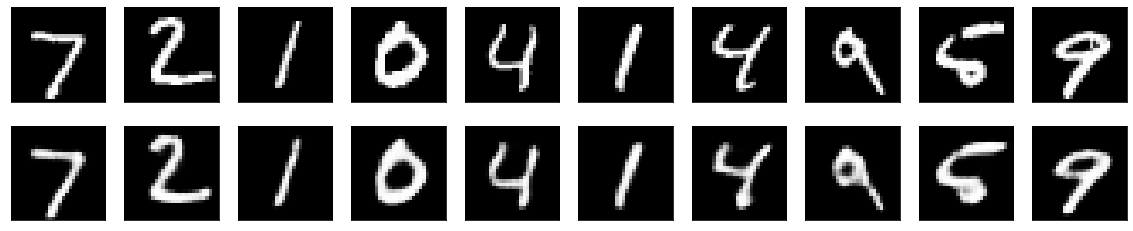

In [ ]:
import matplotlib.pyplot as plt
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()